# KIran Avhad

# Task 5:- To Explore Bussiness Analytics

# import libraries

In [134]:

#import all the libraries first
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

# Reading The Data

In [58]:
df1 = pd.read_csv('D:/FILM/SampleSuperstore.csv')
print("Data imported successfully")
df1.head(10)

Data imported successfully


Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
5  Standard Class   Consumer  United States      Los Angeles  California   
6  Standard Class   Consumer  United States      Los Angeles  California   
7  Standard Class   Consumer  United States      Los Angeles  California   
8  Standard Class   Consumer  United States      Los Angeles  California   
9  Standard Class   Consumer  United States      Los Angeles  California   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   
5        90032   West        Furniture  Furnishings   48.8600         7   
6        90032   West  Office Supplies          Art    7.2800         4   
7        90032   West       Technology       Phones  907.1520         6   
8        90032   West  Office Supplies      Binders   18.5040         3   
9        90032   West  Office Supplies   Appliances  114.9000         5   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  
5      0.00   14.1694  
6      0.00    1.9656  
7      0.20   90.7152  
8      0.20    5.7825  
9      0.00   34.4700

In [59]:
df1.tail(10)

Ship Mode    Segment        Country         City       State  \
9984  Standard Class   Consumer  United States   Long Beach    New York   
9985  Standard Class   Consumer  United States   Long Beach    New York   
9986  Standard Class   Consumer  United States  Los Angeles  California   
9987  Standard Class  Corporate  United States       Athens     Georgia   
9988  Standard Class  Corporate  United States       Athens     Georgia   
9989    Second Class   Consumer  United States        Miami     Florida   
9990  Standard Class   Consumer  United States   Costa Mesa  California   
9991  Standard Class   Consumer  United States   Costa Mesa  California   
9992  Standard Class   Consumer  United States   Costa Mesa  California   
9993    Second Class   Consumer  United States  Westminster  California   

      Postal Code Region         Category Sub-Category    Sales  Quantity  \
9984        11561   East  Office Supplies       Labels   31.500        10   
9985        11561   East  Office Supplies     Supplies   55.600         4   
9986        90008   West       Technology  Accessories   36.240         1   
9987        30605  South       Technology  Accessories   79.990         1   
9988        30605  South       Technology       Phones  206.100         5   
9989        33180  South        Furniture  Furnishings   25.248         3   
9990        92627   West        Furniture  Furnishings   91.960         2   
9991        92627   West       Technology       Phones  258.576         2   
9992        92627   West  Office Supplies        Paper   29.600         4   
9993        92683   West  Office Supplies   Appliances  243.160         2   

      Discount   Profit  
9984       0.0  15.1200  
9985       0.0  16.1240  
9986       0.0  15.2208  
9987       0.0  28.7964  
9988       0.0  55.6470  
9989       0.2   4.1028  
9990       0.0  15.6332  
9991       0.2  19.3932  
9992       0.0  13.3200  
9993       0.0  72.9480

# Exploring Data

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [61]:
df1.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [62]:
df1.shape

(9994, 13)

In [63]:
df1.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [64]:
df1.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [65]:
df1.max()

Ship Mode       Standard Class
Segment            Home Office
Country          United States
City                      Yuma
State                  Wyoming
Postal Code              99301
Region                    West
Category            Technology
Sub-Category            Tables
Sales                  22638.5
Quantity                    14
Discount                   0.8
Profit                 8399.98
dtype: object

In [66]:
df1.min()

Ship Mode         First Class
Segment              Consumer
Country         United States
City                 Aberdeen
State                 Alabama
Postal Code              1040
Region                Central
Category            Furniture
Sub-Category      Accessories
Sales                   0.444
Quantity                    1
Discount                    0
Profit               -6599.98
dtype: object

In [67]:
df1['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [68]:
df1.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [69]:
df1.corr()

Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000

# Data Visualisation Using Matplotlib And Seaborn Library

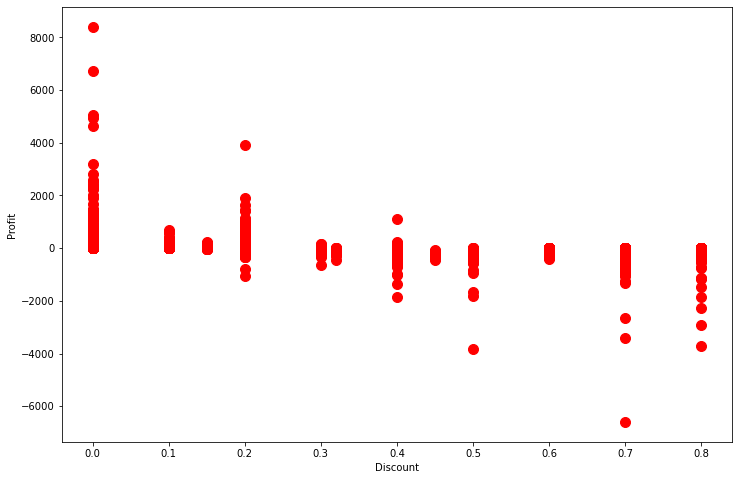

In [70]:
df1.plot.scatter(x='Discount',y='Profit',c='red',s=100,figsize=(12,8))
plt.show()

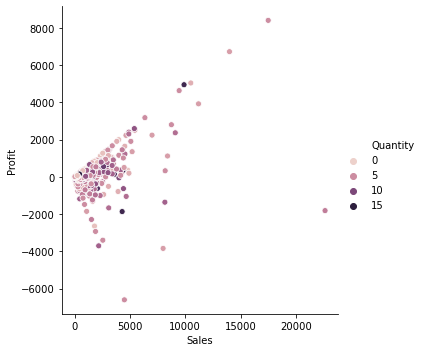

In [71]:
sns.relplot(
    data=df1,
    x='Sales', y='Profit', 
    hue='Quantity'
)

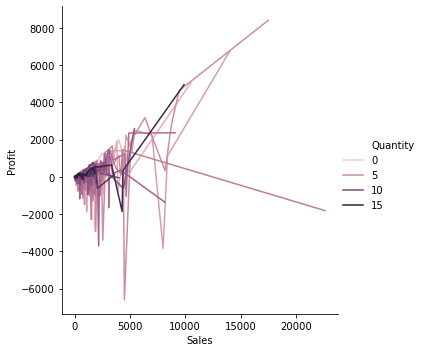

In [72]:
sns.relplot(
    data=df1, kind="line",
  x='Sales', y='Profit', hue='Quantity'
)

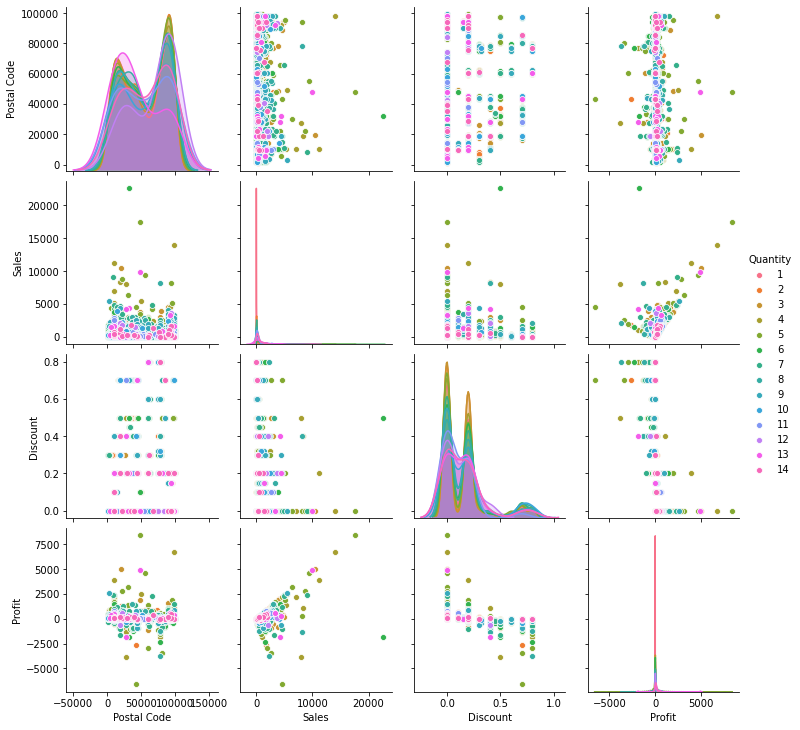

In [75]:
sns.pairplot(data=df1, hue="Quantity")

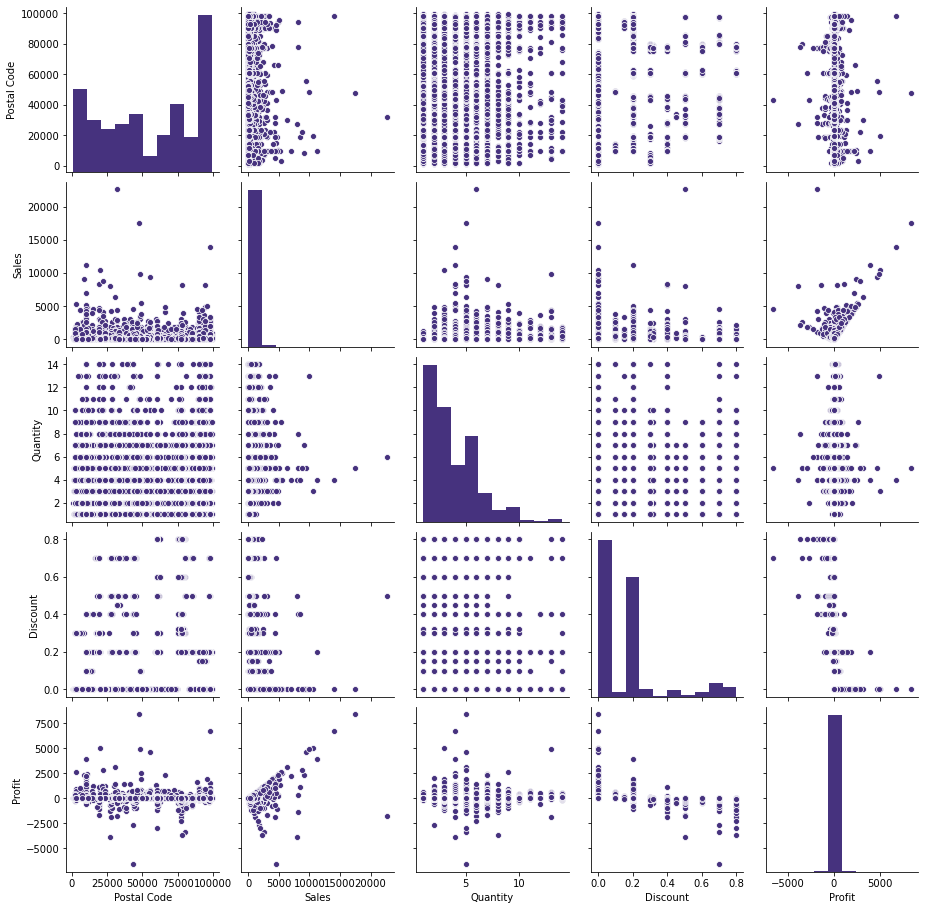

In [76]:
sns.set_palette('viridis')
sns.pairplot(df1)
plt.show()

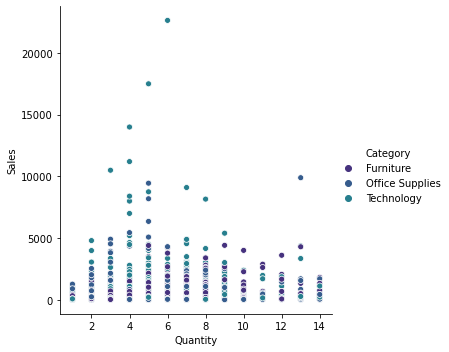

In [77]:
sns.relplot(
    data=df1,
    x="Quantity", y="Sales",hue="Category"
)

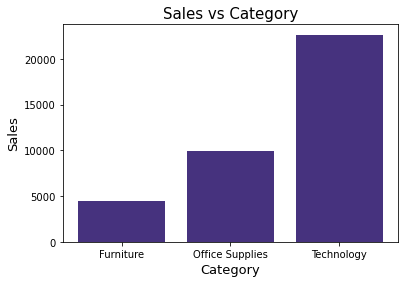

In [78]:
plt.bar('Category','Sales',data=df1)
plt.title('Sales vs Category',size= 15)
plt.xlabel('Category',size= 13)
plt.ylabel('Sales',size= 13)
plt.show()

       Segment  Quantity
0     Consumer     19521
1    Corporate     11608
2  Home Office      6744


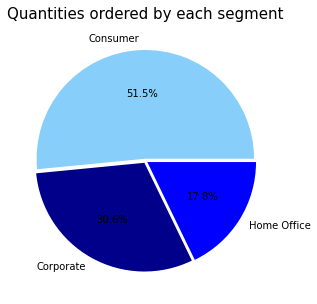

In [79]:
df_group = df1.groupby('Segment')['Quantity'].sum().reset_index()
print(df_group)
labels = df1['Segment'].unique()
colors = ['lightskyblue', 'darkblue', 'blue']
plt.figure(figsize=(5,5))
plt.pie(df_group['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02), colors=colors)
plt.title('Quantities ordered by each segment',size= 15)
plt.show()

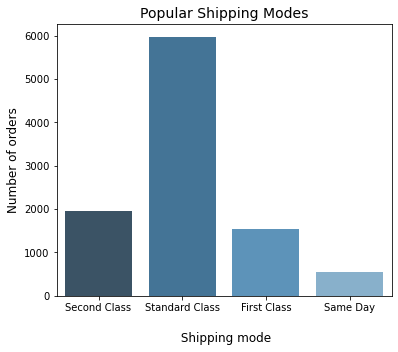

In [80]:
plt.figure(figsize=(6,5))
sns.countplot('Ship Mode',data=df1, palette='Blues_d')
plt.title('Popular Shipping Modes',size=14)
plt.xlabel('\n Shipping mode',size=12)
plt.ylabel('Number of orders',size=12)
plt.xticks(fontsize=10)
plt.show()

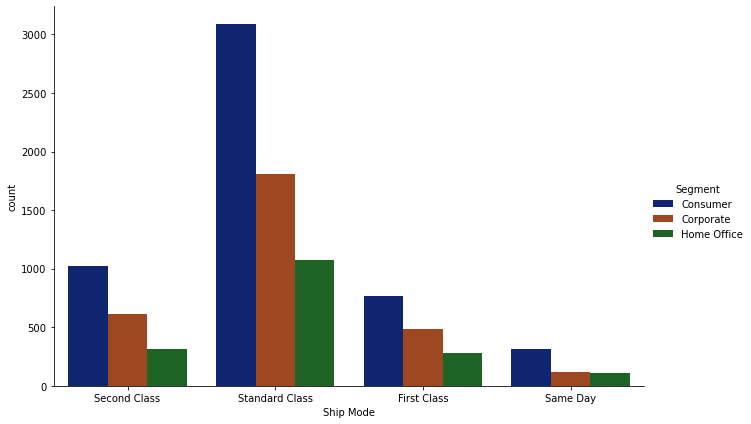

In [81]:
sns.catplot('Ship Mode',data=df1,hue='Segment',kind='count',palette='dark',aspect=1.5,height=6)
plt.show()

In [82]:
df1['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

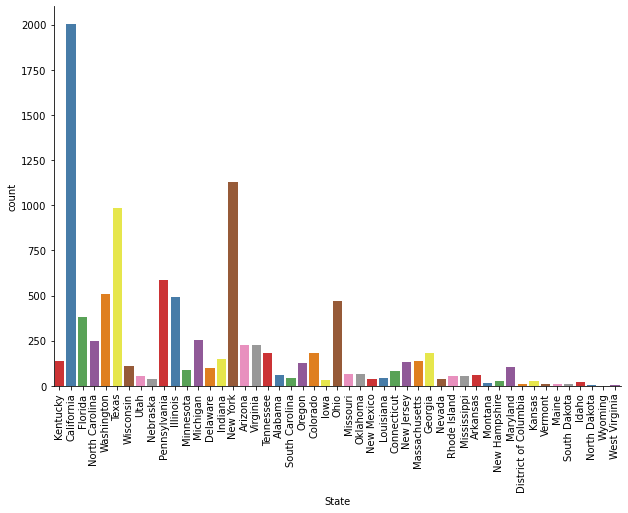

In [83]:
sns.catplot('State',kind='count',data=df1,palette='Set1',height=6,aspect=1.5)
plt.xticks(rotation=90)
plt.show()

In [84]:
dftop10 = df1.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=True)
dftop10

City  Quantity
386    Port Orange         1
259      Littleton         1
257    Lindenhurst         1
140         Elyria         1
213      Iowa City         1
..             ...       ...
452        Seattle      1590
438  San Francisco      1935
374   Philadelphia      1981
266    Los Angeles      2879
329  New York City      3417

[531 rows x 2 columns]

In [85]:
dftop10 = dftop10.head(10)
dftop10.reset_index(drop=True,inplace=True)
dftop10

City  Quantity
0   Port Orange         1
1     Littleton         1
2   Lindenhurst         1
3        Elyria         1
4     Iowa City         1
5       Jupiter         1
6        Keller         2
7  Grand Island         2
8       Baytown         2
9       Holyoke         2

    Region  Quantity
0  Central      8780
1     East     10618
2    South      6209
3     West     12266


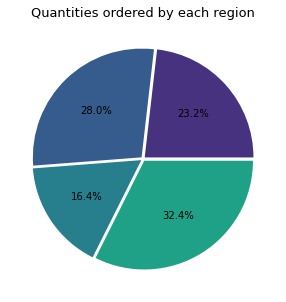

In [86]:
df_region=df1.groupby('Region')['Quantity'].sum().reset_index()
print(df_region)

labels = df_region['Region'].unique()
plt.figure(figsize=(5,5))
plt.pie(df_region['Quantity'],autopct='%1.1f%%',explode=(0.02,0.02,0.02,0.02),)
plt.title('Quantities ordered by each region',size=13)

plt.show()

In [87]:
df_cats = df1.groupby('Category')['Quantity'].sum().reset_index()
df_cats

Category  Quantity
0        Furniture      8028
1  Office Supplies     22906
2       Technology      6939

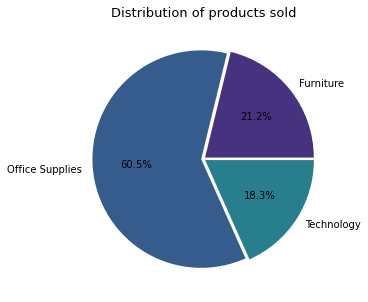

In [88]:
plt.figure(figsize=(5,5))
labels=df_cats['Category'].unique()
plt.pie(df_cats['Quantity'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02))

plt.title('Distribution of products sold',size=13)

plt.show()

          Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


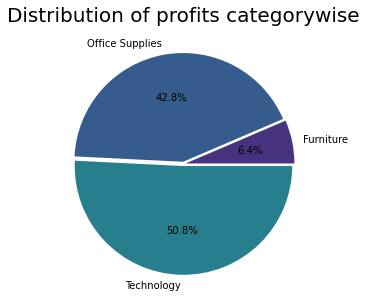

In [89]:
dfprofit = df1.groupby('Category')['Profit'].sum().reset_index()
print(dfprofit)
plt.figure(figsize=(5,5))
labels=dfprofit['Category'].unique()
plt.pie(dfprofit['Profit'],autopct='%1.1f%%',labels=labels,explode=(0.02,0.02,0.02))

plt.title('Distribution of profits categorywise',size=20)
plt.show()


In [90]:
dftop10_items = df1.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
dftop10_items.reset_index(drop=True,inplace=True)
dftop10_items=dftop10_items.head(10)
dftop10_items

Sub-Category      Profit
0      Copiers  55617.8249
1       Phones  44515.7306
2  Accessories  41936.6357
3        Paper  34053.5693
4      Binders  30221.7633
5       Chairs  26590.1663
6      Storage  21278.8264
7   Appliances  18138.0054
8  Furnishings  13059.1436
9    Envelopes   6964.1767

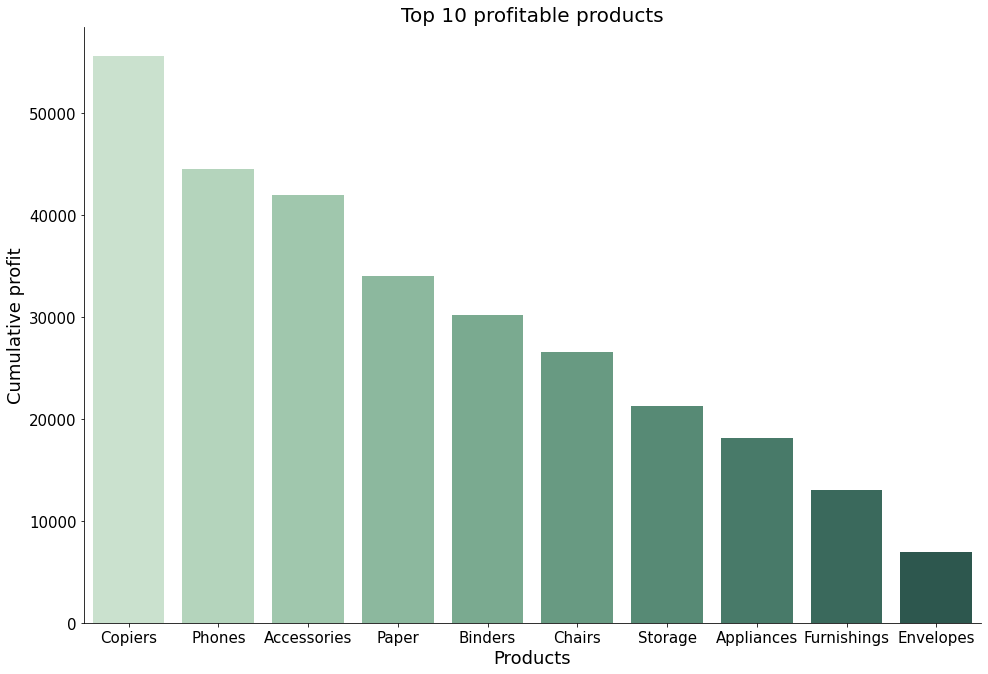

In [91]:
sns.catplot('Sub-Category','Profit',data=dftop10_items,kind='bar',aspect=1.5,height=9,palette='ch:2.5,-.2,dark=.3')
plt.title('Top 10 profitable products',size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=18)
plt.xlabel('Products',size=18)

plt.show()


In [92]:
dftop10_cities = df1.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)

dftop10_cities = dftop10_cities.head(10)
dftop10_cities

City      Profit
329  New York City  62036.9837
266    Los Angeles  30440.7579
452        Seattle  29156.0967
438  San Francisco  17507.3854
123        Detroit  13181.7908
233      Lafayette  10018.3876
215        Jackson   7581.6828
21         Atlanta   6993.6629
300    Minneapolis   6824.5846
437      San Diego   6377.1960

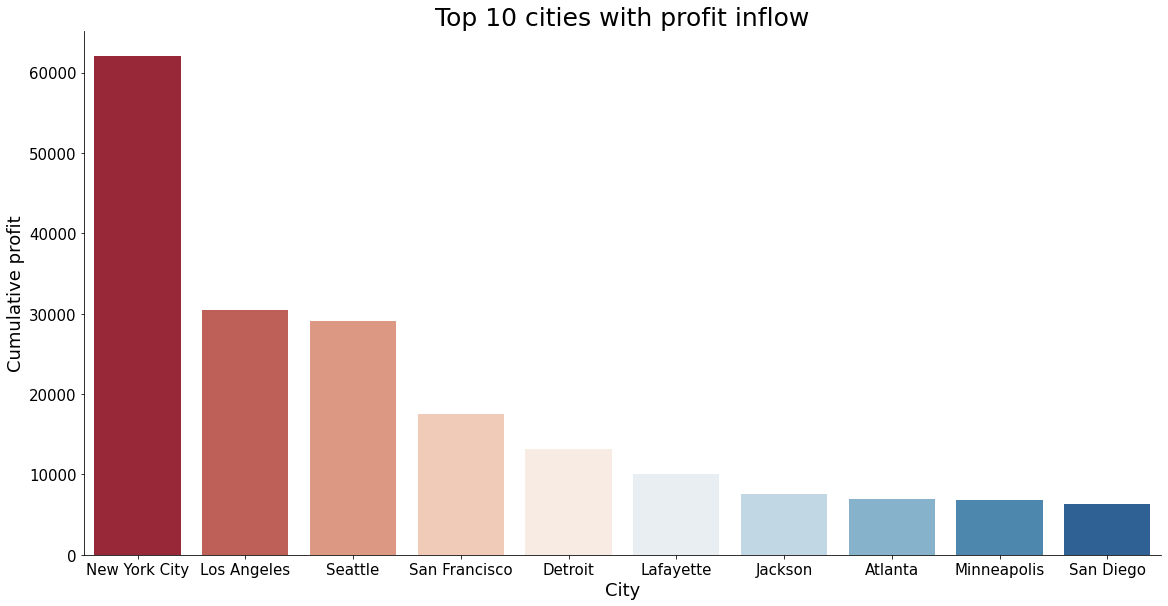

In [93]:
sns.catplot('City','Profit',data=dftop10_cities,kind='bar',aspect=2,height=8,palette='RdBu')
plt.title('Top 10 cities with profit inflow',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Cumulative profit',size=18)
plt.xlabel('City',size=18)

plt.show()

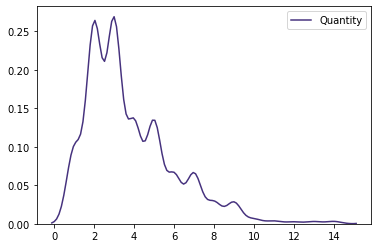

In [105]:
sns.kdeplot(df1["Quantity"]);


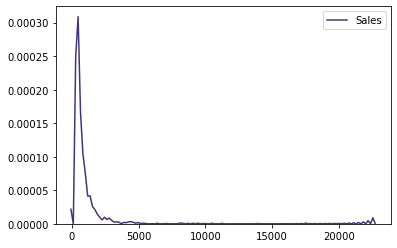

In [107]:
sns.kdeplot(df1["Sales"]);


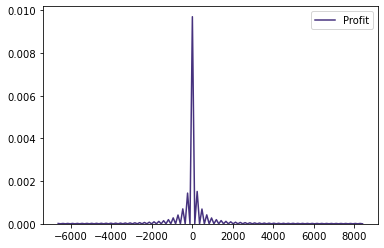

In [108]:

sns.kdeplot(df1["Profit"]);

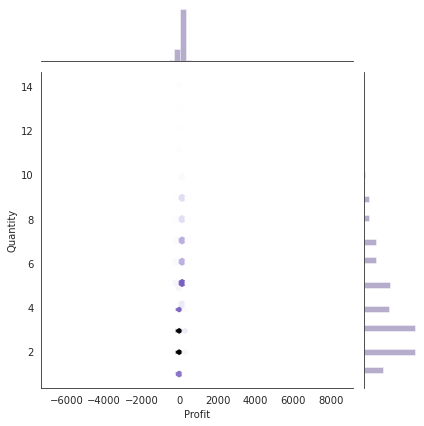

In [116]:
with sns.axes_style('white'):
    sns.jointplot("Profit", "Quantity", data=df1, kind='hex')

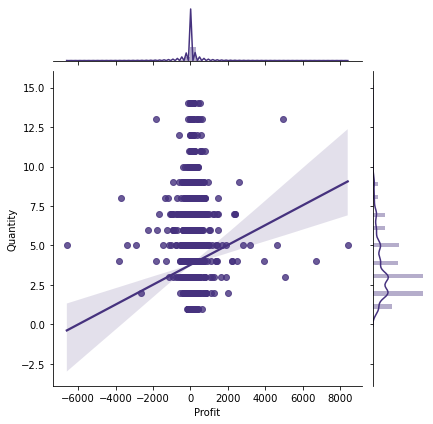

In [117]:
sns.jointplot("Profit", "Quantity", data=df1, kind='reg');


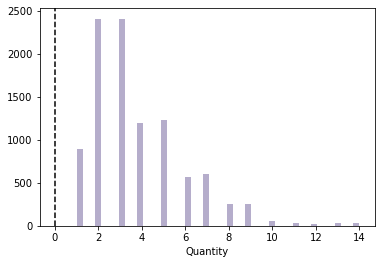

In [124]:
sns.distplot(df1['Quantity'], kde=False);
plt.axvline(0, color="k", linestyle="--");

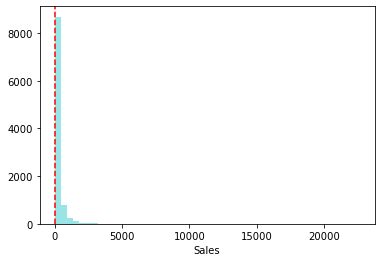

In [127]:
sns.distplot(df1['Sales'], color='c',kde=False);
plt.axvline(0, color="r", linestyle="--");

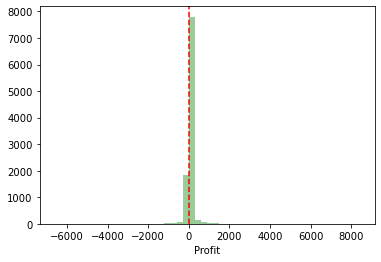

In [128]:
sns.distplot(df1['Profit'], color='g',kde=False);
plt.axvline(0, color="r", linestyle="--");

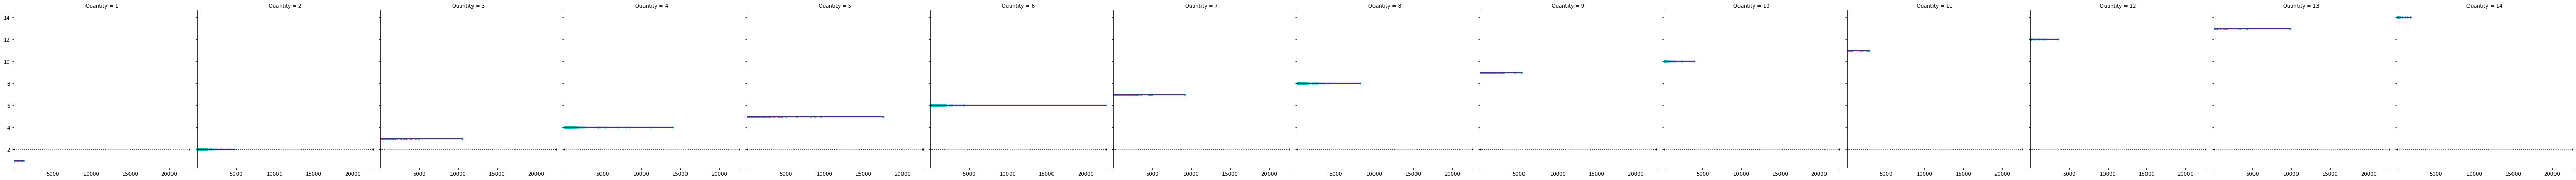

In [132]:
g = sns.lmplot('Sales','Quantity', col='Quantity', data=df1,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=2, color="k", ls=":");